# ORCA 4500 : Foundations of Data Science (Homework 4)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()

Problem - 1

In [3]:
def s_square_hypo_test(mue,sigma,n,m,alpha):
    C = stats.chi2.ppf(1-(alpha/100),n-1)/(10-1)
    random = stats.norm.rvs(scale=sigma,loc=mue,size=(m,n))
    S_squared = np.var(random,axis=1,ddof=1)
    mean_value = np.mean(S_squared>C)
    return mean_value

s_square_hypo_test(mue=0,sigma=2,n=10,m=1000,alpha=5)

0.906

Problem - 2

<AxesSubplot:xlabel='values', ylabel='Count'>

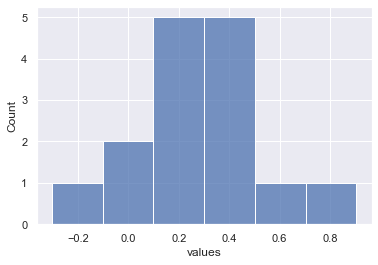

In [4]:
df = pd.read_csv('normal_samples.csv')
normal_dist_values = df['values']
sns.histplot(normal_dist_values)

In [5]:
# When sigma is known 

def hypo_test_norm(dist,alpha,pop_mean=0,sigma=0.3):
    n = len(dist)
    sample_mean = np.mean(dist)
    z_alpha_2 = stats.norm.ppf(1-alpha/(2*100))
    lower_bound = pop_mean - z_alpha_2*sigma / np.sqrt(n)
    upper_bound = pop_mean + z_alpha_2*sigma / np.sqrt(n)
    print(lower_bound,upper_bound)
    if sample_mean>upper_bound or sample_mean<lower_bound :
        return("Null Hypothesis Rejected") 
    else:
        return("Failed to reject the Null Hypothesis")
        
hypo_test_norm(normal_dist_values,alpha=5)

-0.1518181574257992 0.1518181574257992


'Null Hypothesis Rejected'

In [6]:
# When sigma is unknown 

def hypo_test_t(dist,alpha,pop_mean=0):
    n = len(dist)
    sample_mean = np.mean(dist)
    t_alpha_2 = stats.t.ppf(1-alpha/2,n-1)
    lower_bound = pop_mean - t_alpha_2*(np.std(dist,ddof=1))/np.sqrt(n)
    upper_bound = pop_mean + t_alpha_2*(np.std(dist,ddof=1))/np.sqrt(n)
    print(upper_bound,lower_bound)
    if sample_mean>upper_bound or sample_mean<lower_bound :
        return("Null Hypothesis Rejected") 
    else:
        return("Failed to reject the Null Hypothesis")
    
        
hypo_test_t(normal_dist_values,alpha=0.05)

0.14834563123949118 -0.14834563123949118


'Null Hypothesis Rejected'

Problem - 3

<AxesSubplot:xlabel='values', ylabel='Count'>

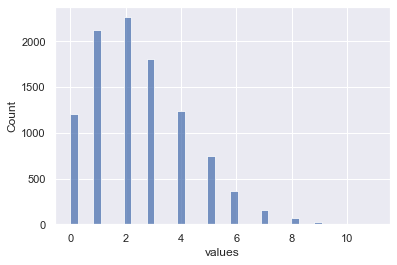

In [7]:
df2 = pd.read_csv('accidents.csv')
accidents = df2['values']
sns.histplot(accidents)

In [8]:
from scipy.stats import percentileofscore

def bootstrap_hypo_test(X,alpha,m=100,mue_0=2.5):
    n = len(X)
    X_resample = np.random.choice(X, size=(m,n))
    mles = np.mean(X_resample,axis=1)
    p = percentileofscore(mles,mue_0)/100
    print(p)
    lower_bound = np.percentile(mles,alpha,axis=0)
    if mue_0 < lower_bound:
        return (True,p)
    else:
        return (False,p)
    
bootstrap_hypo_test(accidents,alpha=5)



0.83


(False, 0.83)